<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0317/blob/main/ximen_0407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
好用第三方函式庫:
1. pandas: 表格函式庫
2. matplotlib: 所有繪圖函式庫的基礎
3. seaborn: 基於matplotlib延伸的函式庫

```



In [ ]:
# !開始代表他不是python語法, 而是command line命令
!pip install pandas

In [ ]:
import json
import urllib.request as req
import pandas as pd


url = "https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=34643&geo=TW%2CHK"
f = req.urlopen(url)
content = f.read()
content_convert = json.loads(content)
data = content_convert["data"]
danmu_list = data["danmu"]

# danmu_list(list) 轉換成 pandas自訂的表格型態 DataFrame
table = pd.json_normalize(danmu_list)
# DataFrame專屬功能
# 如果要tsv, 多加個參數 sep="\t"
# 存的時候會預設幫你多存一行(列標籤) 0 1 2...
# 如果你不要 index=False
table.to_csv("danmu.csv", encoding="utf-8")
# table.to_excel("danmu.xlsx")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '(-9.53, 3536.5]'),
  Text(1, 0, '(3536.5, 7013.0]'),
  Text(2, 0, '(7013.0, 10489.5]'),
  Text(3, 0, '(10489.5, 13966.0]'),
  Text(4, 0, '(13966.0, 17442.5]'),
  Text(5, 0, '(17442.5, 20919.0]'),
  Text(6, 0, '(20919.0, 24395.5]'),
  Text(7, 0, '(24395.5, 27872.0]'),
  Text(8, 0, '(27872.0, 31348.5]'),
  Text(9, 0, '(31348.5, 34825.0]'),
  Text(10, 0, '(34825.0, 38301.5]'),
  Text(11, 0, '(38301.5, 41778.0]'),
  Text(12, 0, '(41778.0, 45254.5]'),
  Text(13, 0, '(45254.5, 48731.0]'),
  Text(14, 0, '(48731.0, 52207.5]'),
  Text(15, 0, '(52207.5, 55684.0]'),
  Text(16, 0, '(55684.0, 59160.5]'),
  Text(17, 0, '(59160.5, 62637.0]'),
  Text(18, 0, '(62637.0, 66113.5]'),
  Text(19, 0, '(66113.5, 69590.0]')])

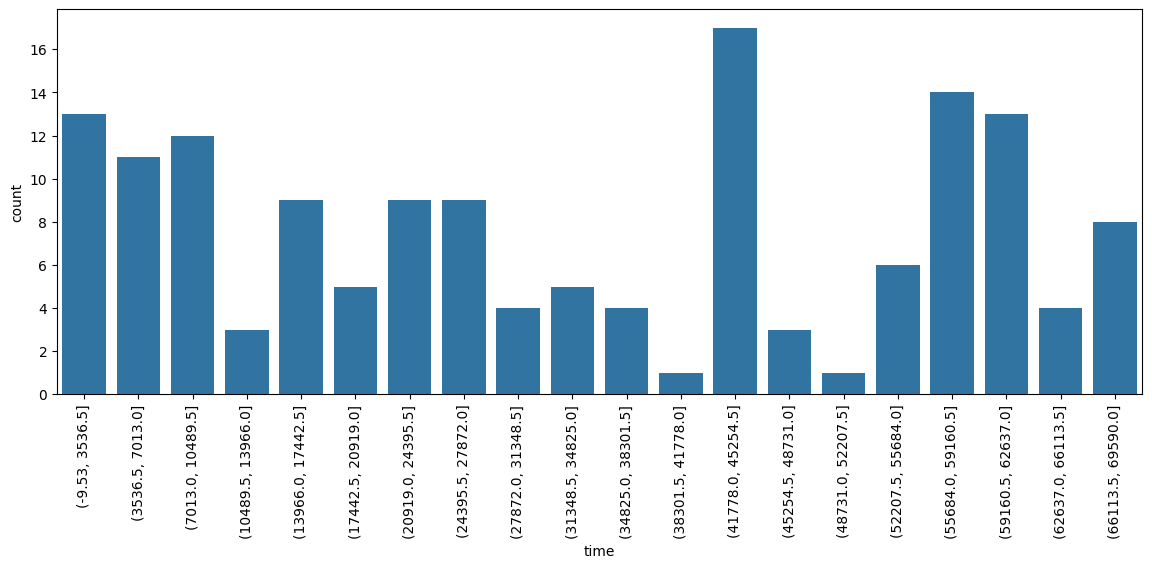

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

table = pd.read_csv("danmu.csv", encoding="utf-8")
# 取行: 基本上跟字典依樣 [key] -> [欄位名稱]
# 取單行
danmu_time = table["time"]
# 取多行(帶給他多個欄位名稱[名稱1, 名稱2])
# table[["userid", "text"]]
danmu_time_cut = pd.cut(danmu_time, bins=20)
# 如果你畫橫的, 刻度(ticks)會重疊
# figure: 設定圖的參數(figsize=圖的大小)
plt.figure(figsize=[14, 5])
sns.countplot(x=danmu_time_cut)
plt.xticks(rotation=90)

In [ ]:
# pandas篩選: 表格[帶入跟你資料筆數依樣多的True/False]
# 隊到True的那列會留下, False會被丟掉
# table.head(3)[[True, False, True]]
# and: & or: |
fil = (table["time"] >= 42000) & (table["time"] <= 45000)
table[fil]

,Unnamed: 0,text,color,size,position,time,sn,userid
85,85,笑死XDD,#FFFFFF,1,0,42459,35570878,everybodygo
86,86,XDDD,#FFFFFF,1,0,42479,35078897,chu020412
87,87,超可愛哈哈哈哈哈,#FFFFFF,1,0,42555,39910354,ILovebangtan
88,88,原來巴哈也有第一天的影片，沒注意到,#FF02D3,1,0,42896,39135949,Pocahontas
89,89,豬豬好可愛,#FFFFFF,1,0,43056,35078922,chu020412
90,90,石頭！！！！！,#FFFFFF,1,0,43558,38063529,gracechen24
91,91,為了看石頭才來看這部！,#FFFFFF,1,0,43670,38063531,gracechen24
92,92,來了,#FFFFFF,1,0,44674,35078994,chu020412
93,93,石頭我愛你<3,#FFFFFF,1,0,44741,38063550,gracechen24
94,94,！！就是這個讓大家都忍不住驚呼的大驚喜！,#FFFFFF,1,0,44760,35028073,TKS4an1m




```
HTML格式

一塊一塊長方形

<a href="連到網址"> -> 長方形開始
    顯示文字
</a> -> 長方形結束

1. 名字: 決定他來幹什麼的
img: 圖片 video: 影片 a: 超連結

2. 屬性: 決定這個長方形的細節部分
(名="值")
img video: src="網址"
a: href="連到的網址"

3. 顯示文字:


網頁構成(前端)
1. HTML: 網頁內容
2. CSS!!!: 排版檔(篩選出某些長方形加上排版)
3. JavaScript: 網頁的互動(程式語言)

下一次的目的: 拿到這個網頁 並且篩出一些特別的長方形

CSS是怎麼篩出這些特別長方形: 他會給這些長方形加上一些特殊屬性(class/id)

1. 篩選HTML名字
a{
    background-color:red
}

class="分類1 分類2"
2. 篩選class
.class名稱{
    background-color:red
}

id="名稱"
3. 篩選id
#id名稱{
    background-color:red
}

```

